In [6]:
import pandas as pd
import yfinance as yf
amzn = yf.Ticker("AMZN")
msft = yf.Ticker("MSFT")
gme = yf.Ticker("GME")

In [47]:
data = {}
for stock in [amzn, msft, gme]:
    data[stock.ticker] = stock.history(period="3mo")["Close"]

In [48]:
data = pd.DataFrame(data)

In [49]:
data

,AMZN,MSFT,GME
Date,,,
2021-01-04,3186.629883,217.189774,17.250000
2021-01-05,3218.510010,217.399292,17.370001
2021-01-06,3138.379883,211.762268,18.360001
2021-01-07,3162.159912,217.788391,18.080000
2021-01-08,3182.699951,219.115341,17.690001
...,...,...,...
2021-03-25,3046.260010,232.339996,183.750000
2021-03-26,3052.030029,236.479996,181.000000
2021-03-29,3075.729980,235.240005,181.300003


In [51]:
data.to_stata("exercise2-data.dta")

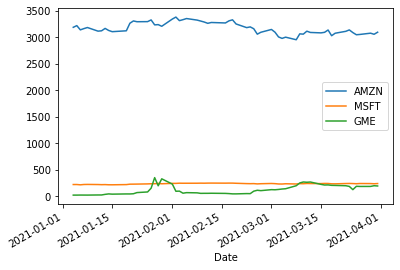

In [10]:
data.plot()

# Devide Each column by the starting price

In [12]:
for col in data.columns:
    data[col] = data[col] / data[col][0]

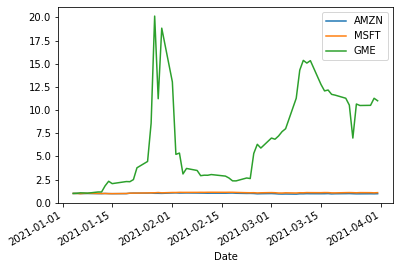

In [14]:
data.plot()

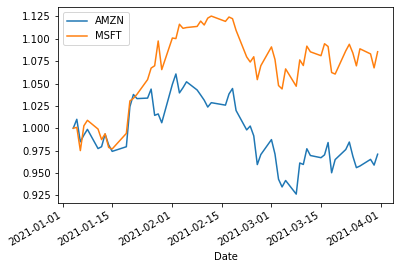

In [16]:
data[['AMZN', 'MSFT']].plot()

In [37]:
import statsmodels.formula.api as smf

In [38]:
results = smf.ols("AMZN ~ MSFT", data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     8.118
Date:                Thu, 01 Apr 2021   Prob (F-statistic):            0.00603
Time:                        16:47:32   Log-Likelihood:                 123.82
No. Observations:                  61   AIC:                            -243.6
Df Residuals:                      59   BIC:                            -239.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6959      0.105      6.627      0.0

In [39]:
results = smf.ols("AMZN ~ GME", data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     10.42
Date:                Thu, 01 Apr 2021   Prob (F-statistic):            0.00203
Time:                        16:48:05   Log-Likelihood:                 124.85
No. Observations:                  61   AIC:                            -245.7
Df Residuals:                      59   BIC:                            -241.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0129      0.007    146.384      0.0

# Other Pandas Methods

In [31]:
data = {}
for stock in [amzn, msft, gme]:
    data[stock.ticker] = stock.history(period="3mo")["Close"]
data = pd.DataFrame(data)

In [32]:
data.loc[data.index[0]]

AMZN    3186.629883
MSFT     217.189774
GME       17.250000
Name: 2021-01-04 00:00:00, dtype: float64

In [33]:
data = data / data.loc[data.index[0]]

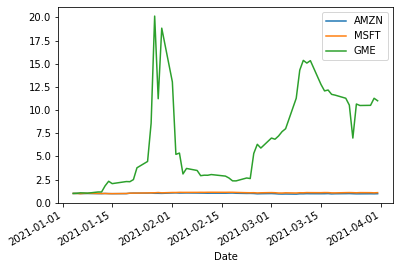

In [34]:
data.plot()

In [36]:
data

,AMZN,MSFT,GME
Date,,,
2021-01-04,1.000000,1.000000,1.000000
2021-01-05,1.010004,1.000965,1.006957
2021-01-06,0.984859,0.975010,1.064348
2021-01-07,0.992321,1.002756,1.048116
2021-01-08,0.998767,1.008866,1.025507
...,...,...,...
2021-03-25,0.955950,1.069756,10.652174
2021-03-26,0.957761,1.088817,10.492754
2021-03-29,0.965198,1.083108,10.510145


# Choose a Date

In [40]:
date = pd.Timestamp('2021-03-01')

In [41]:
date

Timestamp('2021-03-01 00:00:00')

In [43]:
data = data / data.loc[date]

In [46]:
data

,AMZN,MSFT,GME
Date,,,
2021-01-04,1.012870,0.916645,0.143272
2021-01-05,1.023003,0.917529,0.144269
2021-01-06,0.997533,0.893738,0.152492
2021-01-07,1.005092,0.919171,0.150166
2021-01-08,1.011621,0.924771,0.146927
...,...,...,...
2021-03-25,0.968253,0.980586,1.526163
2021-03-26,0.970087,0.998059,1.503322
2021-03-29,0.977620,0.992825,1.505814


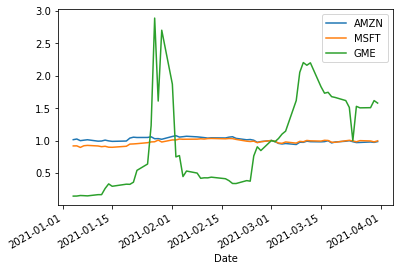

In [45]:
data.plot()